In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame
%matplotlib inline

In [2]:
dataframe = pd.read_csv("InformacionEmpleadoJunto.csv")

In [3]:
dataframe.head()

,NIVEL_CARGO,EDAD,ANTIGUEDAD_ANOS,GENERO,FRAUDE
0,AUXILIAR,31,4,F,S
1,DIRECTOR,39,15,F,N
2,AUXILIAR,49,1,F,N
3,ANALISTA,33,4,F,N
4,ANALISTA,53,22,F,N


# Correlación de variables.

A continuación se procedera a encontrar la correlacion de las variables.

El valor del índice de correlación varía en el intervalo [-1,1], indicando el signo el sentido de la relación:

1) Si r = 1, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.

2) Si 0 < r < 1, existe una correlación positiva.

3) Si r = 0, no existe relación lineal. Pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables.

4) Si -1 < r < 0, existe una correlación negativa.

5) Si r = -1, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación inversa: cuando una de ellas aumenta, la otra disminuye en proporción constante

In [4]:
dataframe.corr()

,EDAD,ANTIGUEDAD_ANOS
EDAD,1.000000,0.808052
ANTIGUEDAD_ANOS,0.808052,1.000000


In [5]:
#df = pd.DataFrame(dataframe)

#df["id"] = pd.to_numeric(df["id"])

# Agrupando columnas por tipo de datos
tipos = dataframe.columns.to_series().groupby(dataframe.dtypes).groups

# Armando lista de columnas categóricas
ctext = tipos[np.dtype('object')]

# cantidad de columnas con datos categóricos. 
len(ctext)

3

In [6]:
# Armando lista de columnas numéricas
columnas = dataframe.columns  # lista de todas las columnas
cnum = list(set(columnas) - set(ctext))
len(cnum)

print(cnum)
print(ctext)

['ANTIGUEDAD_ANOS', 'EDAD']
Index(['NIVEL_CARGO', 'GENERO', 'FRAUDE'], dtype='object')


In [7]:
# Completando valores faltantas datos categóricos
for c in ctext:
    mode = dataframe[c].mode()[0]
    dataframe[c] = dataframe[c].fillna(mode)
    
    
# Completando valores faltantas datos cuantititavos
for c in cnum:
    mean = dataframe[c].mean()
    dataframe[c] = dataframe[c].fillna(mean)

In [8]:
# Convierto las variables categoricas a numericas
for c in ctext:
    dataframe[c], _ = pd.factorize(dataframe[c])

In [9]:
dataframe.head()

,NIVEL_CARGO,EDAD,ANTIGUEDAD_ANOS,GENERO,FRAUDE
0,0,31,4,0,0
1,1,39,15,0,1
2,0,49,1,0,1
3,2,33,4,0,1
4,2,53,22,0,1


In [10]:
dataframe.corr()

,NIVEL_CARGO,EDAD,ANTIGUEDAD_ANOS,GENERO,FRAUDE
NIVEL_CARGO,1.000000,-0.069542,-0.021627,0.031703,-0.157591
EDAD,-0.069542,1.000000,0.808052,0.067838,0.066987
ANTIGUEDAD_ANOS,-0.021627,0.808052,1.000000,0.085142,0.089170
GENERO,0.031703,0.067838,0.085142,1.000000,-0.014407
FRAUDE,-0.157591,0.066987,0.089170,-0.014407,1.000000


In [11]:
# Controlando que no hayan valores faltantes
dataframe.isnull().any().any()

False

# Observaciones y Conclusiones.
A partir de los datos se puede observar que:

*  edad y antiguedad_anos estan fuertmente correlacionadas positivamente , ya que el valor de la correlacion es 0,808052


In [12]:
dataframe.head()


,NIVEL_CARGO,EDAD,ANTIGUEDAD_ANOS,GENERO,FRAUDE
0,0,31,4,0,0
1,1,39,15,0,1
2,0,49,1,0,1
3,2,33,4,0,1
4,2,53,22,0,1


# Transformaciones y Red Neuronal

A continación se procedera a determinar si alguna transformacion del conjunto de datos mejora o empeora el modelo.

Para esto se calcularán los siguientes errores estadisticos:

* SSE
* MAE
* MSE
+ RMSE

In [15]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

C:\Users\CSANT\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
# La transformacion logaritmo no es posible ya que no existe log de numeros negativos

transformations = [("Función Cuadrada", lambda x: x**2),
                   ("Función Cuadratica", lambda x: x**3),
                   ("Función Identidad", lambda x: x)]

for name, transformation in transformations:
    datos = dataframe.apply(transformation)
    X_train, X_test, y_train, y_test = train_test_split(datos.drop(['FRAUDE'], axis=1), 
                                                        datos['FRAUDE'], test_size=0.30)
    
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    
    squared_errors = (y_test - predictions) ** 2

    print("Errores de la Regresión Lineal con la transformación " + name + "\n")
    print('SSE:', np.sum(squared_errors)) 
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print("\n")

Errores de la Regresión Lineal con la transformación Función Cuadrada

SSE: 13.09449980158506
MAE: 0.16603822240257882
MSE: 0.07234530277118818
RMSE: 0.2689708214122643


Errores de la Regresión Lineal con la transformación Función Cuadratica

SSE: 14.247731385008429
MAE: 0.17471244706950945
MSE: 0.07871674798347199
RMSE: 0.2805650512509924


Errores de la Regresión Lineal con la transformación Función Identidad

SSE: 21.44357565930633
MAE: 0.19369595987545865
MSE: 0.11847279369782503
RMSE: 0.3441987706221872




# Análisis de los Errores

Despues de obtener los respectivos errores al aplicar cada transformación al modelo, se puede observar que estos errores tienen valores muy altos, por lo tanto se concluye que no es óptimo para el modelo realizar alguna transformación.

# Red Neuronal


In [18]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt

In [19]:
x=dataframe.drop(['FRAUDE'],axis=1)
y=dataframe[['FRAUDE']]
y=np.reshape(y, (-1,1))
scaler = MinMaxScaler()
print(scaler.fit(x))
print(scaler.fit(y))
xscale=scaler.transform(x)
yscale=scaler.transform(y)


MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


# Entrenamiento

In [23]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 25)                125       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 26        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


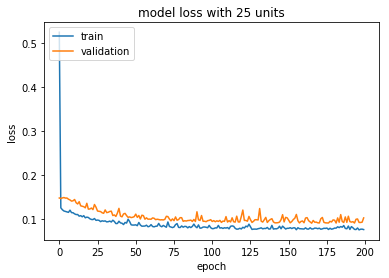

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 625)               3125      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 626       
Total params: 3,751
Trainable params: 3,751
Non-trainable params: 0
_________________________________________________________________


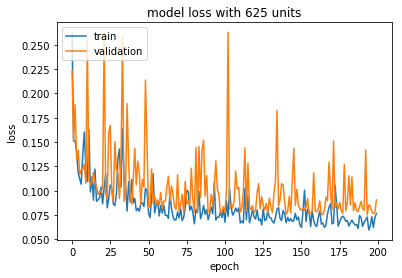

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 15625)             78125     
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 15626     
Total params: 93,751
Trainable params: 93,751
Non-trainable params: 0
_________________________________________________________________


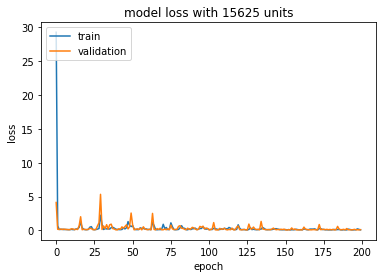

In [27]:

quantity_of_neurons = [25, 625, 15625]
for units in quantity_of_neurons:
    model = Sequential()
    
    # Funcion de Activacion
    model.add(Dense(units, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    
    # Neurona de Salida
    model.add(Dense(1, activation='linear'))
    model.summary()
    
    ## optimizacion usando gradiente
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    history = model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0, validation_split=0.2)
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss with ' + str(units) + " units")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    

       

# Resultado

* Finalmente, se logra minimizar al maximo el margen de error del modelo, ya que como se puede observar en la grafica el modelo de validacion es muy semejante al modelo del entrenamiento

# Predicciones

* A continuación según el modelo entrenado anteriormente se procederá a realizar predicciones


* 0 = Si Fraude
* 1 = No Fraude

In [46]:
predictions = model.predict_classes(X_train)
for i in range(10):
    result = '%s => %d (esperado %d)' % (X_train[i].tolist(), predictions[i], y_train[i])
    print(result)

[4.0, 32.0, 4.0, 1.0] => 0 (esperado 0)
[2.0, 24.0, 3.0, 1.0] => 1 (esperado 1)
[2.0, 25.0, 3.0, 0.0] => 1 (esperado 1)
[2.0, 24.0, 0.0, 0.0] => 1 (esperado 1)
[3.0, 45.0, 18.0, 1.0] => 1 (esperado 1)
[2.0, 25.0, 3.0, 1.0] => 1 (esperado 1)
[2.0, 44.0, 23.0, 0.0] => 1 (esperado 1)
[2.0, 31.0, 6.0, 0.0] => 1 (esperado 1)
[0.0, 39.0, 12.0, 0.0] => 1 (esperado 1)
[0.0, 38.0, 8.0, 1.0] => 1 (esperado 1)


# Interpretación

Para poder interpretar los datos obtenidos anteriormente en los pronosticos se debe tener en cuenta los siguientes aspectos:

In [35]:
x.head()

,NIVEL_CARGO,EDAD,ANTIGUEDAD_ANOS,GENERO
0,0,31,4,0
1,1,39,15,0
2,0,49,1,0
3,2,33,4,0
4,2,53,22,0


* Como se puede observar anteriormente nuestro modelo consta de 4 variables de entrada que son NIVEL_CARGO, EDAD,ANTIGUEDAD_ANOS,GENERO


* Por lo tanto tomando de ejemplo el primer resultado se obtiene que:

    * Una persona con cargo 4 (Coordinador) de 32 Años de Edad con 4 Años de Antiguedad y Genero Femenino tiene una probabilidad alta de efectuar el fraude

# Generación de Archivo CSV

* A continuacion se convierten los datos obtenidos en un dataframe para posteriormente convertirlos en un archivo CSV para trabajar con estos y poder notificar.

In [62]:
from pandas import DataFrame as df

predictions = model.predict_classes(X_train)

df = pd.DataFrame({'Datos': [], 'Fraude': []})

for i in range(10):
    df = df.append({'Datos': X_train[i].tolist(), 'Fraude': predictions[i].tolist() }, ignore_index=True)

## Se crea el Archivo
df.to_csv('Notificacion.csv')

## Se muestra como quedara el archivo
df

,Datos,Fraude
0,"[4.0, 32.0, 4.0, 1.0]",[0]
1,"[2.0, 24.0, 3.0, 1.0]",[1]
2,"[2.0, 25.0, 3.0, 0.0]",[1]
3,"[2.0, 24.0, 0.0, 0.0]",[1]
4,"[3.0, 45.0, 18.0, 1.0]",[1]
5,"[2.0, 25.0, 3.0, 1.0]",[1]
6,"[2.0, 44.0, 23.0, 0.0]",[1]
7,"[2.0, 31.0, 6.0, 0.0]",[1]
8,"[0.0, 39.0, 12.0, 0.0]",[1]
9,"[0.0, 38.0, 8.0, 1.0]",[1]
